# Data Visualization with Python Matplotlib for Beginner - Part 1

In [48]:
import pandas as pd 
import matplotlib.pyplot as plt

In [49]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

In [50]:
print('Ukuran dataset: %d baris dan %d kolom\n' %dataset.shape)
print('Lima data teratas:\n')
print(dataset.head())


Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


Aku dan teman-teman di ruangan rapat sibuk menyimak penjelasan ini:

order_id : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer

order_date : tanggal terjadinya transaksi

customer_id : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali

city : kota tempat toko terjadinya transaksi

province : provinsi (berdasarkan city)

product_id : ID dari suatu product yang dibeli

brand : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama

quantity : Kuantitas / banyaknya product yang dibeli

item_price : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli

In [51]:
dataset.dtypes

order_id        int64
order_date     object
customer_id     int64
city           object
province       object
product_id     object
brand          object
quantity        int64
item_price      int64
dtype: object

In [52]:
import datetime
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())
dataset.dtypes

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


order_id        int64
order_date     object
customer_id     int64
city           object
province       object
product_id     object
brand          object
quantity        int64
item_price      int64
order_month    object
dtype: object

In [53]:
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' %dataset.shape)
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


In [54]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


# PLOT

In [55]:
import matplotlib.pyplot as plt 

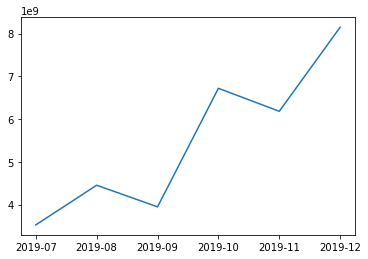

In [56]:
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

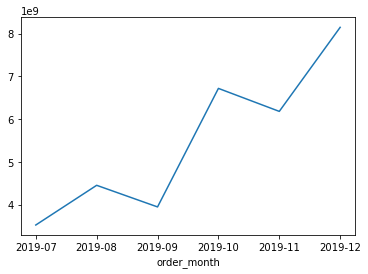

In [57]:
dataset.groupby('order_month')['gmv'].sum().plot()
plt.show()

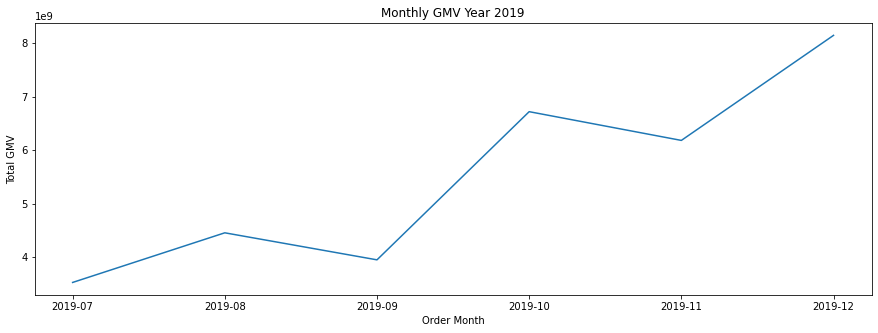

In [58]:
plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

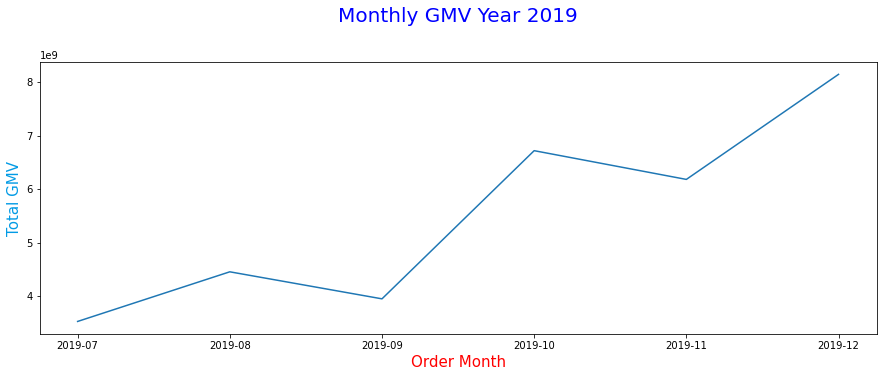

In [59]:
plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15, color='red')
plt.ylabel('Total GMV', fontsize = 15, color='#039be5')
plt.show()

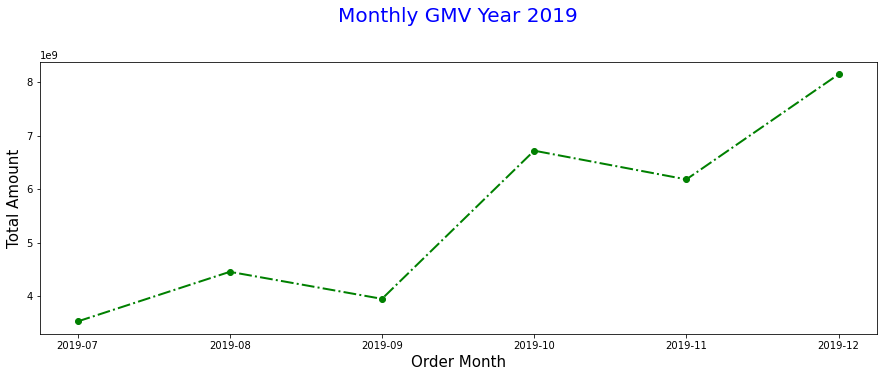

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

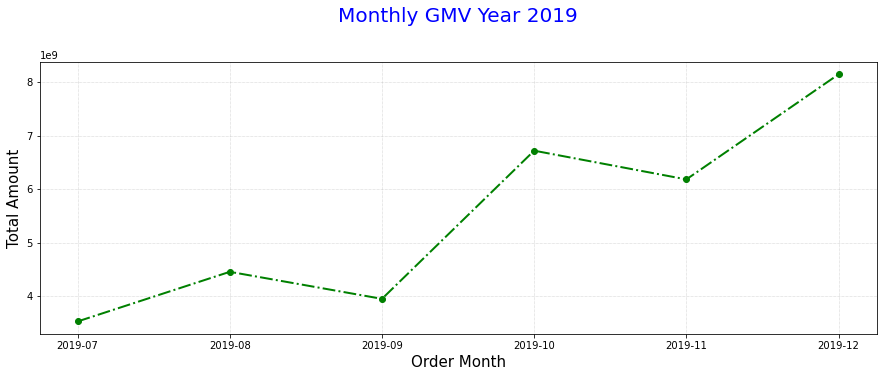

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle = ':', linewidth=0.5)
plt.show()

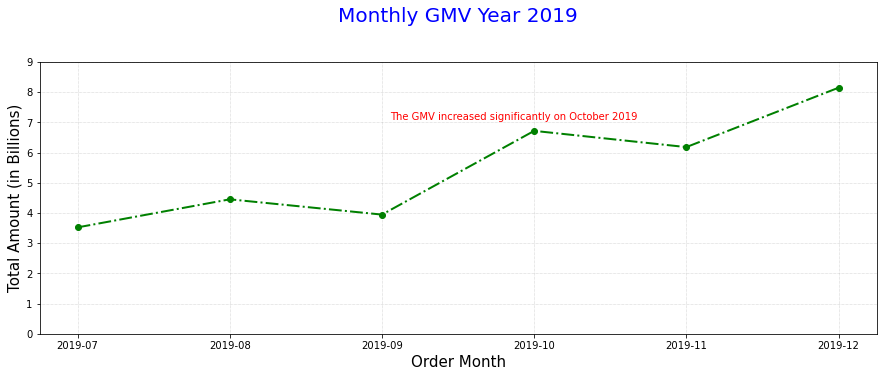

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))

#KOMPONEN PLOT
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)

#KOMPONEN JUDUL
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')

#KOMPONEN LABEL X AXIS
plt.xlabel('Order Month', fontsize=15)

#KOMPONEN LABEL Y AXIS 
plt.ylabel('Total Amount (in Billions)', fontsize=15)

#KOMPONEN GRID
plt.grid(color='darkgray', linestyle = ':', linewidth=0.5)

plt.ylim(ymin=0)

#KOMPONEN X,Y TICKS
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

#KOMPONEN TEXT
plt.text(0.45,0.72,'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')

#SAVE
plt.savefig('monthly_gmv.jpg')
plt.show()

#pilihan save
plt.gcf().canvas.get_supported_filetypes()